In [230]:
#--- いつもの ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

#--- ここから ---
import datetime
x = datetime.datetime.combine(datetime.date(2017, 2, 1), datetime.time.min)
github = pd.read_csv('dataset/github.csv', parse_dates=True, names=['github'], index_col=0)
ghe = pd.read_csv('dataset/ghe.csv', parse_dates=True, names=['ghe'], index_col=0)

ghe.tail(10)
# date で join
data = github.join(ghe)
data.tail(10)


# 9月以降だけにする
after_from = datetime.datetime.combine(datetime.date(2016, 9, 1), datetime.time.min)
data = data[data.index >= after_from]

<IPython.core.display.Javascript object>


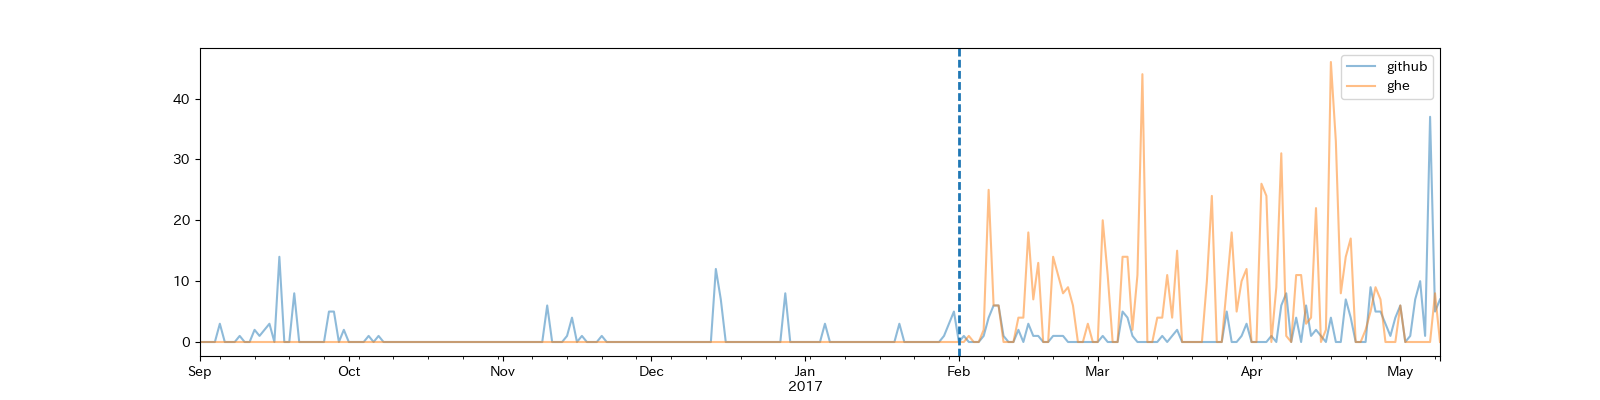

In [231]:
result = data.plot(figsize=(16,4), alpha=0.5)
result.axvline(x, linestyle='dashed', linewidth=2)

<IPython.core.display.Javascript object>


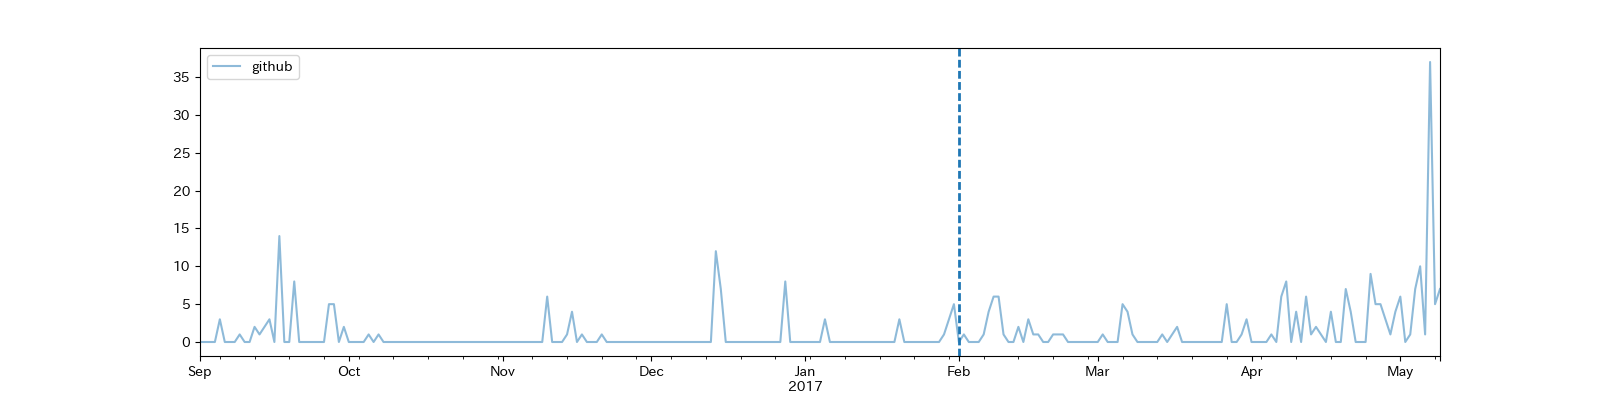

In [233]:
result = data[['github']].plot(figsize=(16,4), alpha=0.5)
result.axvline(x, linestyle='dashed', linewidth=2)

<IPython.core.display.Javascript object>


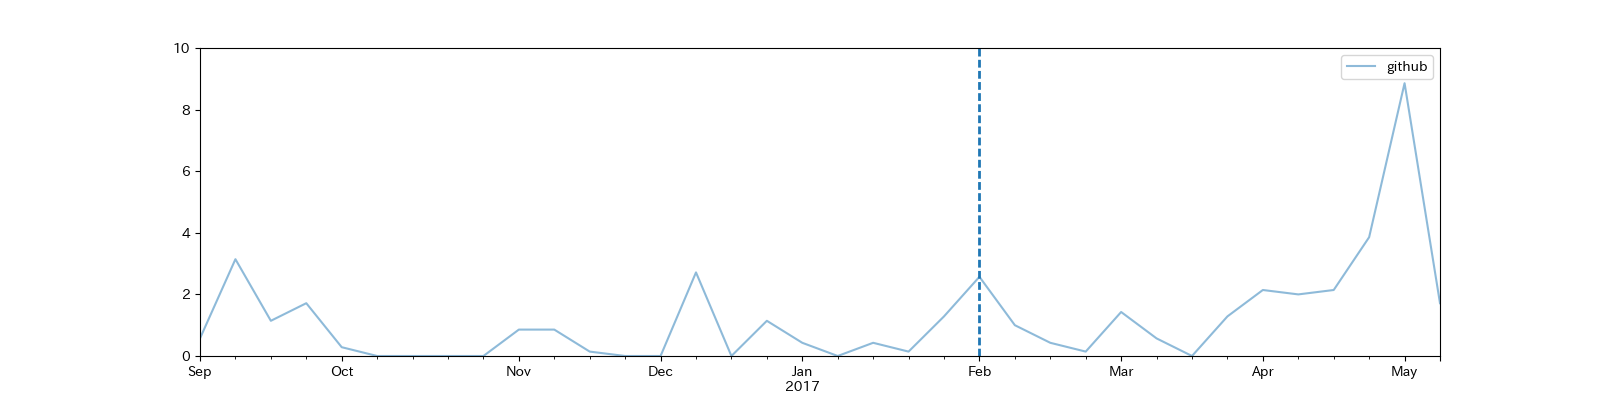

In [234]:
# github のみを取る
commit_github = data[['github']]
# 7日間の平均を取る
N_day = 7
commit_github['weekofyear'] = commit_github.index.weekofyear
weekofyear = commit_github[commit_github.index.dayofweek == 0].drop('github', axis=1).dropna()
weekofyear.describe()
sum = commit_github.groupby('weekofyear').sum().dropna() / 7
sum.describe()
result_data = weekofyear.merge(right=sum, left_on='weekofyear', right_index=True)
result_data.tail(10)
# plot
result = result_data.plot(y=['github'], ylim=(0,10), figsize=(16,4), alpha=0.5)
result.axvline(x, linestyle='dashed', linewidth=2)